# Project: Financial Data - Advanced Analysis Techniques

### Brief Project Decription

In this project, we undertake a deeper dive into analyzing financial data by deploying some advanced analysis techniques. In particular, we are going to solve the following tasks:
- Calculate, Visualize and Compare the DJIA SMA50 vs. SMA200 (based on daily Close Prices). Select the day May 15, 2017 and Verify, whether a Trader with SMA Momentum Strategy was invested (long) in the DJIA at this day!
- __Calculate__ the DJIA __36 months rolling mean return__ and the __36 months rolling standard deviation__ of returns (based on monthly returns of Close prices). __Visualize__, __Compare__ and __indicate__, whether there is a __positive or negative relation__ between __risk and return__!
- __Import__ the __S&P 500 Total Return Index__ dataset (__SP500_TR.csv__) and __create__ the annual __Return Triangle__. Based on historical data, are there any time periods of __11 Years or longer__ where investors __lost money__?
- __Import__ the monthly returns of the __S&P 500__ Price Return Index and the __DJIA__ Price Return Index (__sp500_djia.csv__).
-  __Calculate__ and __Visualize__ the 36 months __rolling correlation__ between S&P 500 returns and DJIA returns.

### Import the data and first inspection

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import datetime as dt

<ipython-input-1-c6a8a8280631>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Use files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
djia = pd.read_csv('/content/drive/MyDrive/djia.csv',index_col=[0], parse_dates=[0])
djia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-12-29,2736.35,2763.01,2726.96,2753.20,2753.20,14580000
1990-01-02,2748.72,2811.65,2732.51,2810.15,2810.15,20680000
1990-01-03,2814.20,2834.04,2786.26,2809.73,2809.73,23620000
1990-01-04,2804.39,2821.46,2766.42,2796.08,2796.08,24370000
1990-01-05,2786.90,2810.15,2758.11,2773.25,2773.25,20290000


In [4]:
djia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,22871.74,23254.59,22396.34,22445.37,22445.37,900510000
2018-12-24,22317.28,22339.87,21792.20,21792.20,21792.20,308420000
2018-12-26,21857.73,22878.92,21712.53,22878.45,22878.45,433080000
2018-12-27,22629.06,23138.89,22267.42,23138.82,23138.82,407940000
2018-12-28,23213.61,23381.88,22981.33,23062.40,23062.40,336510000


In [5]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 1989-12-29 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7307 non-null   float64
 1   High       7307 non-null   float64
 2   Low        7307 non-null   float64
 3   Close      7307 non-null   float64
 4   Adj Close  7307 non-null   float64
 5   Volume     7307 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 399.6 KB


### Calculate, Visualize and Compare the DJIA SMA50 vs. SMA200 (based on daily Close Prices)

In [6]:
# Select the Colse column and convert the series into a DataFrame
djia = djia['Close'].to_frame()
djia.head()

,Close
Date,
1989-12-29,2753.20
1990-01-02,2810.15
1990-01-03,2809.73
1990-01-04,2796.08
1990-01-05,2773.25


In [34]:
# Calculate the Simple Moving Average for a time window of 50 days and store the results in a new column called SMA50.
djia["SMA50"] = djia.Close.rolling(window = 50).mean()

# Calculate the Simple Moving Average for a time window of 200 days and store the results in a new column called SMA50.
djia["SMA200"] = djia.Close.rolling(window = 200).mean()
djia.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,22445.37,24914.1782,25046.02945
2018-12-24,21792.20,24848.9656,25028.31175
2018-12-26,22878.45,24799.7348,25016.81095
2018-12-27,23138.82,24757.5002,25007.46990
2018-12-28,23062.40,24702.7798,24998.99130


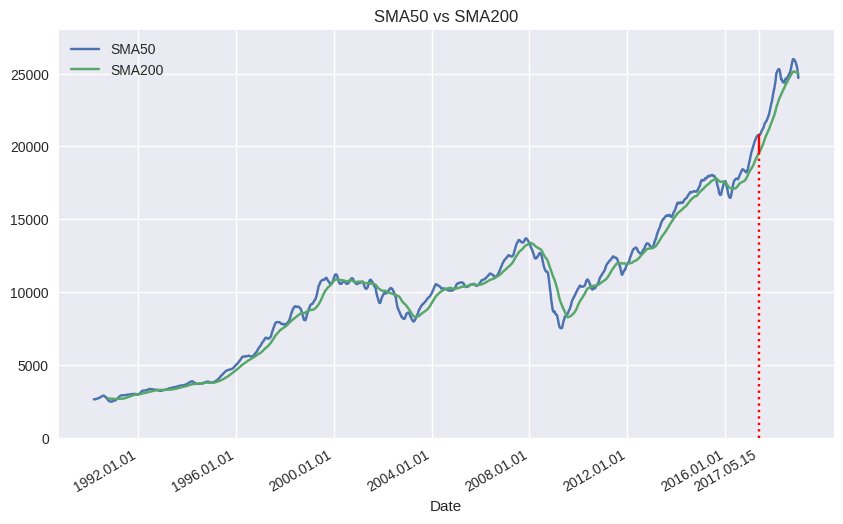

In [8]:
## Plot the graphs for the SMA50 and SMA200 and highlight their the distance at May 15, 2017
djia.iloc[:,-2:].plot(figsize=(10,6), fontsize=10)

# Get the SMA200 value on May 15, 2017
ymin = (djia.loc['2017-05-15'][2]/28000)

# Get the SMA50 value on May 15, 2017
ymax = (djia.loc['2017-05-15'][1]/28000)
plt.ylim(-0,28000)

# Customize the x-labels
plt.axvline(dt.datetime(2017, 5, 15),ymin =ymin , ymax=ymax, color='r')
plt.axvline(dt.datetime(2017, 5, 15),ymin =0 ,ymax=ymin, color='r', linestyle='dotted')
plt.xticks([dt.datetime(1992, 1, 1), dt.datetime(1996, 1, 1), dt.datetime(2000, 1, 1), dt.datetime(2004, 1, 1),dt.datetime(2008, 1, 1),
            dt.datetime(2012, 1, 1), dt.datetime(2016, 1, 1), dt.datetime(2017, 5, 15)],
 [dt.datetime(1992, 1, 1).strftime('%Y.%m.%d'), dt.datetime(1996, 1, 1).strftime('%Y.%m.%d'),
  dt.datetime(2000, 1, 1).strftime('%Y.%m.%d'), dt.datetime(2004, 1, 1).strftime('%Y.%m.%d'),
  dt.datetime(2008, 1, 1).strftime('%Y.%m.%d'), dt.datetime(2012, 1, 1).strftime('%Y.%m.%d'),
  dt.datetime(2016, 1, 1).strftime('%Y.%m.%d'),  dt.datetime(2017, 5, 15).strftime('%Y.%m.%d')])

plt.title('SMA50 vs SMA200')

plt.show()


__Rule: Whenever the Simple Moving Average of the shorter period is higher than the Simple Moving Average of the longer period, the trader with a momentum strategy should invest.__

Following that logic a trader with momentum Strategy is most likly to invest in the Dow Jones Industrial Average Index (DJIA) at May 15, 2017, since the SMA50 is above the SMA200 (the solid red line in the plot above represents the distance between SMA50 and SMA200).

### Calculate the DJIA 36 months rolling mean return

__Rolling returns are a measure of investment performance that’s calculated based on historical data gathered over a specific time frame.__

In [9]:
month_ret = djia['Close'].to_frame().resample('M', kind='period').last().pct_change().dropna()
month_ret.head()

,Close
Date,
1990-01,-0.059080
1990-02,0.014171
1990-03,0.030435
1990-04,-0.018635
1990-05,0.082770


### Calculate 36 months rolling standard deviation of returns

In [10]:
# Calculate 36 months rolling standard deviation of returns
month_ret['Return'] = month_ret.rolling(36).mean()*12
month_ret['Risk'] = month_ret['Close'].rolling(36).std()*np.sqrt(12)
month_ret.dropna(inplace=True)
month_ret.head()

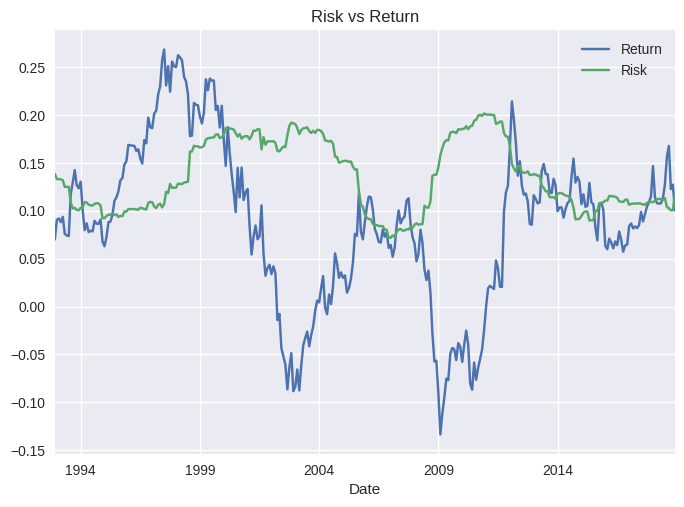

In [12]:
# Plot return and risk as line plots
month_ret.iloc[:,-2:].plot()
plt.title('Risk vs Return')
plt.show()

As the graphs of return and risks suggest, there is a relationship: if the risk is rising, the return is declining. We further investigate this relationship by computing the correlation between risk and return next.

In [13]:
# Compute correlation between risk and return
month_ret.drop(columns='Close',axis=1).corr()

,Return,Risk
Return,1.000000,-0.386493
Risk,-0.386493,1.000000


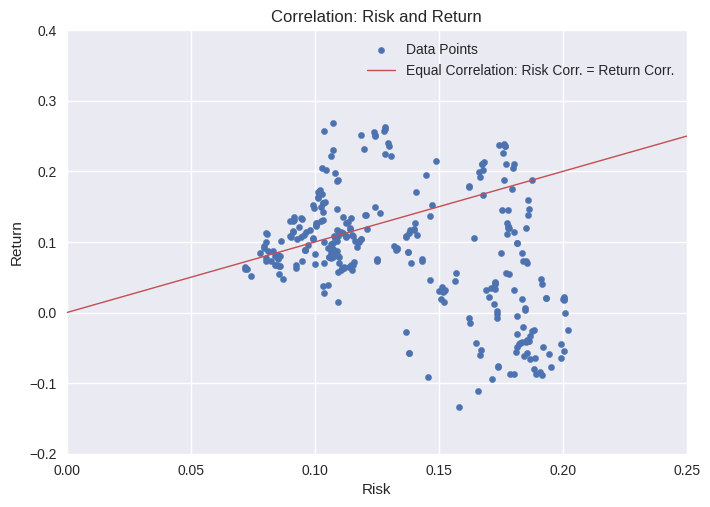

In [37]:
# Polt the correlation between risk and return
month_ret.iloc[:,-2:].plot(kind='scatter',x='Risk', y='Return', label='Data Points')

# Plot the equlibrium line, where risk equals return
plt.axline((0, 0), (1, 1), linewidth=1, color='r', label='Equal Correlation: Risk Corr. = Return Corr.')
plt.xlim([0,0.25])
plt.ylim([-0.2,0.4])
plt.legend()
plt.title('Correlation: Risk and Return')
plt.show()

### Import the S&P 500 Total Return Index dataset

In [15]:
SP500_TR = pd.read_csv('/content/drive/MyDrive/SP500_TR.csv', index_col=[0], parse_dates=[0])
SP500_TR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-12-30,288.12,288.12,288.12,288.12,288.12,0
1989-01-03,285.65,285.65,285.65,285.65,285.65,0
1989-01-04,289.99,289.99,289.99,289.99,289.99,0
1989-01-05,290.61,290.61,290.61,290.61,290.61,0
1989-01-06,291.29,291.29,291.29,291.29,291.29,0


In [16]:
SP500_TR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,4899.41,4976.56,4787.04,4802.51,4802.51,0
2018-12-24,4770.95,4790.00,4672.66,4672.66,4672.66,0
2018-12-26,4696.63,4904.61,4664.09,4904.49,4904.49,0
2018-12-27,4854.87,4946.94,4766.39,4946.94,4946.94,0
2018-12-28,4967.52,5010.16,4916.64,4941.61,4941.61,0


In [17]:
SP500_TR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7559 entries, 1988-12-30 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7559 non-null   float64
 1   High       7559 non-null   float64
 2   Low        7559 non-null   float64
 3   Close      7559 non-null   float64
 4   Adj Close  7559 non-null   float64
 5   Volume     7559 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 413.4 KB


### Create the Annual Return Triangle

The annual return triangle is a great way to visually illustrate graphically how lucrative stocks are over certain periods. Moreover, with return triangles, we can demonstrate that the long run is not only dependent on the length of the investment period but even more so on the actual dates the investment starts and ends.

In [18]:
# Store the columns of the DataFrame in the variable "columns" for later use.
column_names = list(SP500_TR.columns)
column_names

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [19]:
# Since we want to have annualized data, we have to resample the time series to annualize timestamps.
annual = SP500_TR.resample('A', kind='periode').last()
annual.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-12-31,288.12,288.12,288.12,288.12,288.12,0
1989-12-31,379.41,379.41,379.41,379.41,379.41,0
1990-12-31,367.63,367.63,367.63,367.63,367.63,0
1991-12-31,479.63,479.63,479.63,479.63,479.63,0
1992-12-31,516.18,516.18,516.18,516.18,516.18,0


In [20]:
# We are using log returns by taking the logarithm of the current closing price divided by the previous closing price.
# The previous closing price is obtained using the shift method.
annual['return'] = np.log(annual['Close']/annual['Close'].shift())
annual.dropna(inplace=True)
annual.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
1989-12-31,379.41,379.41,379.41,379.41,379.41,0,0.275240
1990-12-31,367.63,367.63,367.63,367.63,367.63,0,-0.031540
1991-12-31,479.63,479.63,479.63,479.63,479.63,0,0.265938
1992-12-31,516.18,516.18,516.18,516.18,516.18,0,0.073441
1993-12-31,568.20,568.20,568.20,568.20,568.20,0,0.096018


In [21]:
# Get the number of years covered by the time series
years = annual.index.size

# Create a list containing all years in reverse order
window = [year for year in range(years,0,-1)]

# Add new columns to the dataFrame. Each column represents a year, where each of those columns is assigned to the annual rolling mean return of that year.
for year in window:
  annual['{}Y'.format(year)] =annual['return'].rolling(year).mean()

# Display DataFrame
annual

30

In [25]:
# Add the column name of the return column to the list of column names
column_names.append('return')

# Drop all columns of the list from the DataFrame
triangle = annual.drop(columns=column_names, axis=1)

# Reset and transform the index so that only years are displayed
triangle = triangle.reset_index()
triangle['Date'] = triangle['Date'].apply(lambda x: x.strftime('%Y'))
triangle.set_index('Date', inplace=True)
triangle

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275240
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121850,-0.031540
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169879,0.117199,0.265938
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.145770,0.102613,0.169689,0.073441
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.135819,0.100964,0.145132,0.084729,0.096018
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.115371,0.083397,0.112132,0.060863,0.054574,0.013131
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.144462,0.122666,0.153507,0.125399,0.142719,0.166069,0.319008
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.152241,0.134670,0.162372,0.141659,0.158713,0.179612,0.262852,0.206697
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.167315,0.153824,0.180305,0.166033,0.184551,0.206684,0.271202,0.247300,0.287903


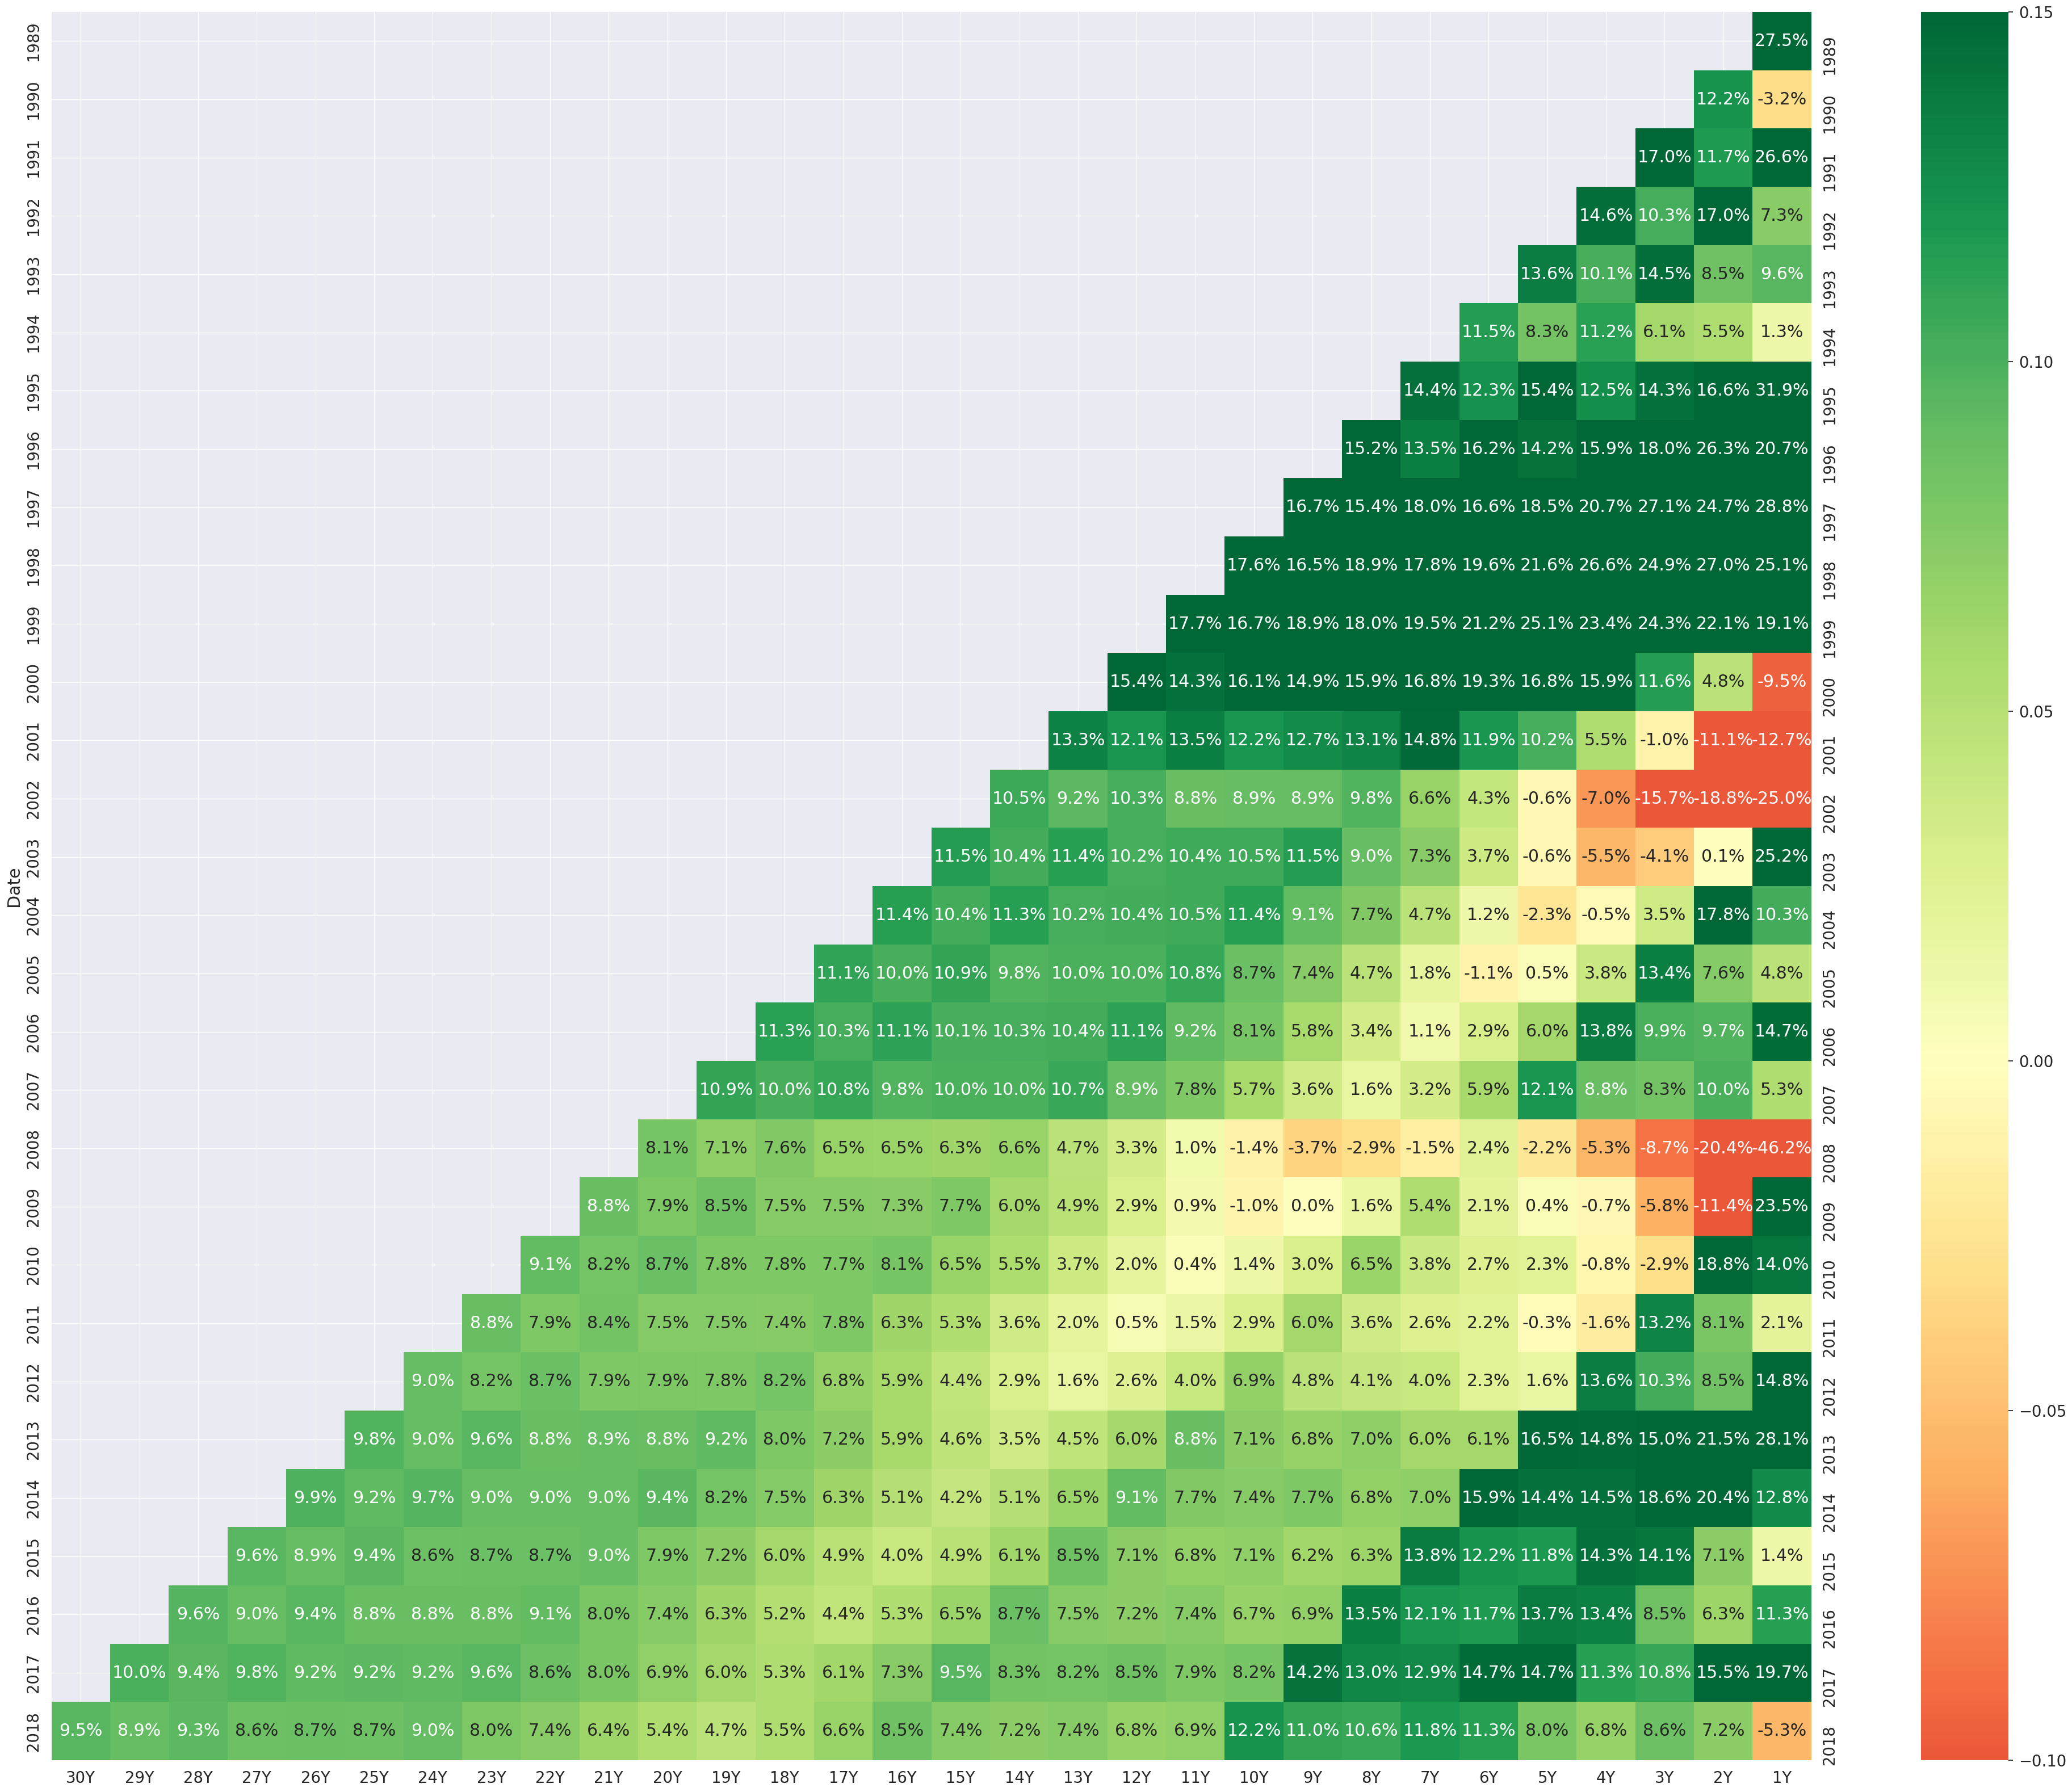

In [26]:
# Plot the annual return triangle
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot=True, fmt='.1%', cmap='RdYlGn', vmin=-.1, vmax=.15, center=0)
plt.tick_params(axis='y', labelright=True)
plt.show()

The return triangle shows that there are no time periods of 11 years or longer where investors lost money.

### Import the monthly returns of the S&P 500 Price Return Index and the DJIA Price Return Index

In [27]:
sp500_djia = pd.read_csv('/content/drive/MyDrive/sp500_djia.csv', index_col=[0], parse_dates=[0])
sp500_djia.head()

,SP500,DJIA
Date,,
1990-01-01,-0.068817,-0.059080
1990-02-01,0.008539,0.014171
1990-03-01,0.024255,0.030435
1990-04-01,-0.026887,-0.018635
1990-05-01,0.091989,0.082770


### Calculate and Visualize the 36 months rolling correlation between S&P 500 returns and DJIA returns

In [28]:
# Calculate the 36 months rolling correlation between S&P 500 returns and DJIA returns
roll_corr = sp500_djia['SP500'].rolling(window=36).corr(sp500_djia['DJIA'])
roll_corr.tail(15)

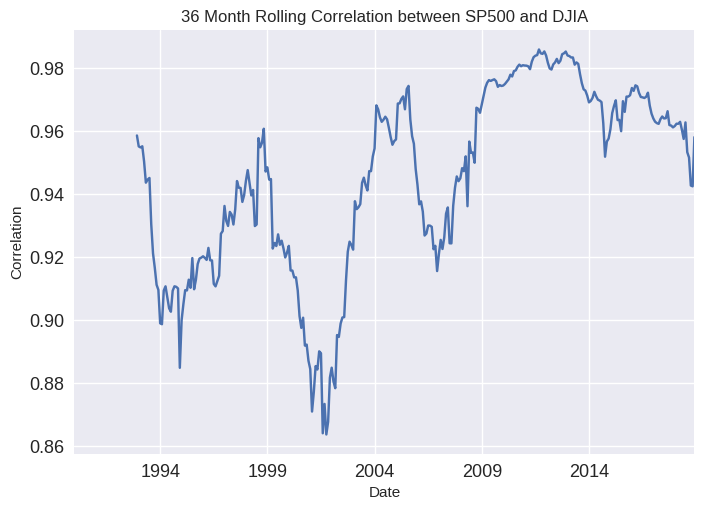

In [38]:
# Plot the 36 months rolling correlation between S&P 500 returns and DJIA returns
roll_corr.plot(fontsize=13)
plt.title('36 Month Rolling Correlation between SP500 and DJIA')
plt.ylabel('Correlation')
plt.show()

## References:

https://www.udemy.com/course/finance-data-with-python-and-pandas/